In [ ]:
# 1강 자연어처리 및 AI 모델링 프로세스
# 자연어 전처리 > AI 모델링
# 1. 자연어 전처리
# 1) 토크나이징: 토큰화, 필터링
# 2) 벡터 표현: Bag of Words, DTM, TF-IDF
# 3) 임베딩: 워드 임베딩, Word2Vec, FastText
# 2. AI 모델링
# 언어 모델: RNN, LSTM, Seq2Seq, Attention, Transformer, BERT

# 언어 용어 이해
# 어절 > 형태소 > 음절 > 자소
# 어절: 띄어쓰기 단위, 형태소: 어절 단위로 나누어진 것을 어간과 어미로 분류
# 음절: 각 글자 하나하나, 자소: 한 개의 글자를 자음, 모음으로 분류
# 오렌지는 맛있다
# 어절: 오렌지는 / 맛있다
# 형태소: 오렌지 / 는 / 맛있 / 다
# 음절: 오 / 렌 / 지
# 자소: ㅇ / ㅗ / ㄹ / ㅔ / ㄴ / ㅈ / ㅣ

# 자연어처리의 문제는 '분류'
# 의미 분석기(질문, 요구 등), 구문 분석기, 감성 분석기, 형태소 분석기, 개체명 인식기

# 자연어 특징 추출/분류를 위해 전처리 -> 토크나이징 -> 모델링 -> 분류

In [ ]:
# 2강
# 1) 컴퓨터가 자연어 잘 이해하도록 만들자
# 말뭉치 > 띄어쓰기 체크 > 토크나이징 > 태깅 > 필터링
# 2) 토크나이징
# 말뭉치를 "토큰" 단위(문장, 어절, 형태소, 음절 등)로 나누는 작업
# 3) 필터링
# 불필요한 단어나 특수문자 제거

# 토크나이징: 문장을 단어나 형태소 단위로 나누는 작업 -> 컴퓨터가 잘 이해하기 위해서
# 토크나이징: 말 뭉치를 토큰 단위로 나누는 것 / 토큰은 목적에 따라 문장, 어절, 형태소, 음절 등으로 될 수 있음
# 토큰을 나누는 방법이 학습에 영향을 줌
# 보통 한글은 형태소 단위로, 영어는 어절 단위로 나눈다.
# 형태소: 의미의 기능을 부여하는, 언어의 형태론적 수준에서 가장 작은 단위

# PoS 태깅(Part of Speech tagging): 한글의 경우, 말뭉치를 형태소 단위로 나누고 각 형태소의 품사 판별함

# 필터링: 문장의 불필요한 단어를 제거
# 예를 들어, 1) 거의 등장하지 않는 단어 2) -은, -는과 같은 조사 3) 특수문자


In [ ]:
# 3강
# 토큰화: 주어진 코퍼스에서 토큰이라 불리는 단위로 나누는 작업을 토큰화
# 즉, 문장을 주면 문장 단위나 어절 단위나 형태소 단위로 나누게 되는 것을 말하며
# 나누어진 토큰을 컴퓨터가 이해할 수 있게 정수로 매핑해야 함

# 1. 자연어 처리 (1)

### 1. 단어 토큰화(Word Tokenization)
- NLTK는 영어 코퍼스를 토큰화하기 위한 도구들을 제공: word_tokenize와 WordPunchTokenizer
- 입력: "Time is an illusion. Lunchtime double so"
- 출력: "Time", "is", "illusion", "Lunchtime", "double", "so"

- 한국어는 형태소 단위로, 영어는 띄어스기 단위로 나누는 것이 일반적이다.

In [ ]:
# Word_tokenize uses sent_tokenize internally to split text into sentences
# sent_tokenize requires the Punkt sentence boundary model provided by the 'punkt' or 'punkt_tab'resources

# First, it uses a sentence-tokenizer (the Punkt model via sent_tokenize) to split the text into sentences
# Then it applies a rule-based word tokenizer to each sentence to split it into work tokens
# So, word_tokenize: Combines sentence boundary detection and word-level tokenization

In [33]:
import nltk

# Punkt tokenizer: NLTK's unsupervised sentence boundary detector
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shinjoohwan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [35]:
# word_tokenize uses sent_tokenize internally to split text into sentences
from nltk.tokenize import word_tokenize
print(word_tokenize("Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery goes for a pastry shop."))

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [39]:
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr.Jone's Orphanage is as cheery goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


### 2. 문장 토큰화(Sentence Tokenization)

In [57]:
from nltk.tokenize import sent_tokenize
text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


### 3. NLTK 이용하여 영어 토큰화 및 품사 태깅

In [63]:
from nltk.tokenize import word_tokenize
text = "I am actively looking for Ph.D. students. and you are a Ph.D. student"
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student']


In [69]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

from nltk.tag import pos_tag
x = word_tokenize(text)
pos_tag(x)

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/shinjoohwan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN')]

### 

### 4. KoNLPy를 이용하여 한국어 토큰화 및 품사 태깅
- KoNLPy: 파이썬 한국어 NLP
- 한글 형태소 분류기: Hananum, Kkma, Komoran, Mecab, Okt

In [73]:
# 한글어를 토큰화나 형태소 분리하기 위해 konlpy 설치 필요
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 41.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.4/583.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 19.4 MB/s eta 0:00:00a 0:00:01


### OKT 형태소 분석기

In [76]:
# okt import
from konlpy.tag import Okt
okt = Okt()

In [78]:
# morphs: 형태소 추출
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [80]:
# pos: 품사 태깅(Part-of-speech tagging)
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [82]:
# nouns : 명사 추출
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']


### 꼬꼬마 형태소 분석기(Kkma)

In [87]:
# kkma import
from konlpy.tag import Kkma
kkma = Kkma()

In [89]:
# morphs: 형태소 추출
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [91]:
# pos: 품사 태깅(Part-of-speech tagging)
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


In [93]:
# nouns : 명사 추출
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['코딩', '당신', '연휴', '여행']


### 배운 내용 정리
- 1. 문장을 주로 어절이나 형태소 단위(단어)로 나누는 것을 '토큰화'라고 한다
  2. 영어 토큰화는 ntlk 라이브러리의 word_tokenize 사용한다
  3. 한글 토큰화는 KoNLPy 라이블러리의 OKT, KKMA 사용한다
  4. 필요할 때 라이브러리 가져다가 사용해서 토큰화하면 된다

# 2. 자연어 처리(2) - 토크나이징(토큰화, 필터링)
## 한글 전처리 및 Tokenization
- 본 과정에서는 한글 문장에 대해 불필요한 특수문자, 이메일, 다수 공백 등을 제거하는 전처리 수행 후에 토큰화하겠습니다.
- 읽어들인 문장들을 전처리: 한글, 영문, 숫자, 공백 이외는 제거
- 전처리된 문장들을 한글 형태소 분석기 이용하여 Tokenize

[학습 목차]
1. 한글 토크나이징 Konlpy 설치
2. A 방송사 댓글 파일 읽어오기
3. 한글 전처리: 특수문자, 이메일, URL 제거하고 한글, 영문, 숫자, 공백 이외는 제거
4. KoNLPy 형태소 분석기 사용하여 단어 토큰화
5. kss 사용하여 문장 단위 토큰화

### 1. 한글 토크나이징 Konlpy 설치

In [99]:
# Konlpy: 한국어 정보 처리를 위한 파이썬 패키지, 형태소 기반 토크나이징
# Konlpy: 패키지 안에 Hannanum, Kkma, Komoran, Oky 형태소 분류가 있다

!pip install konlpy

### 2. A 방송사 댓글 파일 읽어오기

In [102]:
# pandas read_excel 사용 시 필요 라이브러리
! pip install openpyxl # Pandas에서 excel 파일 읽어올 때 필요한 라이브러리

import os
import re
import pandas as pd

In [104]:
# A_comment_train.xlsx A 방송사 댓글 다운로드 및 Pandas read_excel() 함수 활용하여 읽어오기
# engine: In pd.read_excel, the engine parameters tells pandas which underlying library to use for reading the Excel file.
commnet = pd.read_excel('https://github.com/gzone2000/TEMP_TEST/raw/master/A_comment_train.xlsx', engine = 'openpyxl')
commnet.tail()

,Unnamed: 0,data,label
246,246,영상F서비스로 간편하게 설치!좋아요\n우리 회사화이팅!,긍정
247,247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다! 화이팅 입니다.,긍정
248,248,"사내방송 특성상 최근 이슈화 되거나, 언급이 자주되는 '키워드'를 중심으로 뉴스를 ...",부정
249,249,방송 시간이 너무 길어요.,부정
250,250,"처음 들어보는 말들이 많은데,, 설명이 없어서 힘드네요.",부정


In [114]:
# 리스트 형태로 데이터 만들기

sent_list = list(commnet.data[:100].values)
sent_list[:2]

['재미는 있는데 시간이 짧은게 아쉽네요~', 'OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄']

### 3. 한글 전처리
- 특수문자, 이메일, URL 제거
- 많은 공백은 1개의 공백으로
- 숫자는 'NUM' 표현
- 한글, 영문, 숫자, 공백 이외는 제거

In [154]:
# 're' module: Provide support for working with regular expressions-patterns used to match text
# Regular expressions(정규표현식): Sequences of characters that define search patterns for matching text
# re.compile(pattern): Python takes your text pattern (the string) and "prepares" it 

# List of characters to remove
removal_list = r"""‘, ’, ◇, ‘’, ’’, ’’, ’’, \“, ’, △, ●, •, ■, (, ), \", »›, `, /, -, ~, =, ·, <, >, . .?, !, [, ], …, ◆, %"""


# Email-matching pattern
EMAIL_PATTERN = re.compile(r'''(([a-zA-Z0-9._%+-]+)@([a-zA-Z0-9.-]+)(\.[a-zA-Z]{2,4}))''')

# URL-matching pattern
URL_PATTERN = re.compile("((ftp|http|https)?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+)")

# Pattern to collapse multiple spaces into one
MULTIPLE_SPACES = re.compile(' +', re.UNICODE)


In [156]:
# re.sub: A function in Python's 're' module that replaces occurrences of a pattern in text 

def cleansing_other(sentence):
    """
    # 문장을 전처리 (이메일, URL, 공백 등 제거) 하는 함수
    : param sentence: 전처리 대상 문장
    : return: 전처리 완료된 문장
    """
    sentence = re.sub(EMAIL_PATTERN, ' ', sentence)
    sentence = re.sub(URL_PATTERN, ' ', sentence)
    sentence = re.sub(MULTIPLE_SPACES, ' ', sentence)
    sentence = sentence.replace(", )", "")

    return sentence

In [158]:
# /s: whitespace character(spaces, tabs, newlines, etc)

def cleansing_numbers(sentence):
    """
    # 숫자를 전처리 (이메일, URL, 공백 등 제거) 하는 함수
    : param sentence: 전처리 대상 문장
    : return: 전처리 완료된 문장
    """
    sentence = re.sub('[0-9]+', 'NUM', sentence)
    sentence = re.sub(r'NUM\s+', "NUM", sentence)
    sentence = re.sub(r'[NUM]+', "NUM", sentence)

    return sentence

In [160]:
# str.maketrans(from_str, to_str): 첫 번째 인자의 각 문자(from_str)를 두 번째 인자의 같은 위치 문자(to_str)로 매핑하는 변환 테이블을 생성한다
# sentence.translate(table): 위에서 만든 변환 테이블을 사용해 sentence 내의 키(즉, removal_list에 있던 문자)들을 모두 대응값(공백)으로 바꾼다

def cleansing_special(sentence):
    """
    # 특수문자를 전처리를 하는 함수
    :param sentence: 전처리 대상 문장
    :return: 전처리 완료된 문장
    """
    sentence = re.sub("[.,\'\"“”!?]", "", sentence)
    sentence = re.sub(r"[^가-힣0-9a-zA-Z\\s]", " ", sentence)
    sentence = re.sub(r"\s+", " ", sentence)

    # removal_list에 정의된 특수문자를 모두 공백으로 바꾸기
    sentence = sentence.translate(str.maketrans(removal_list, ' ' * len(removal_list)))
    # 양끝 공백 제거
    sentence = sentence.strip()

    return sentence

In [164]:
def preprocess_sent(sentence) :
    """
    # 모든 전처리를 수행하는 함수
    : param sentence: 전처리 대상 문장
    : return: 전처리 완료된 문장
    """
    sent_clean = sentence
    sent_clean = cleansing_other(sent_clean)
    sent_clean = cleansing_special(sent_clean)
    sent_clean = cleansing_numbers(sent_clean)
    sent_clean = re.sub(r'\s+', ' ', sent_clean)

    return sent_clean

In [166]:
# 한글 샘플 내용을 1개 가져와 전처리 수행

sample_sentence = sent_list[5]
print(sample_sentence)

너무 재밌게 잘봤습니다~! ㅋㅋ
송OO씨가 출근하자마자 안마의자 앉아서 쉬는게 부럽기도(?) 했네요
쇼호스트분들의 진행솜씨또한 감탄하고 갑니다. 다음은 어디 외부 탐방 예정인가요?!


In [168]:
clean_sentence = preprocess_sent(sample_sentence)
clean_sentence

'너무 재밌게 잘봤습니다 송OO씨가 출근하자마자 안마의자 앉아서 쉬는게 부럽기도 했네요 쇼호스트분들의 진행솜씨또한 감탄하고 갑니다 다음은 어디 외부 탐방 예정인가요'

In [174]:
# 여러 개의 한글 샘플 전처리 수행

clean_sentences = []
for sample_sentence in sent_list:
    clean_sentence = preprocess_sent(sample_sentence)
    clean_sentences.append(clean_sentence)

clean_sentences[:5]

['재미는 있는데 시간이 짧은게 아쉽네요',
 'OO 관련 내용은 우리 직원과는 거리가 멀었음 특히 사내에 홍보할 내용은 아니라고 봄',
 '스토리가 너무 딱딱해서 별로였음',
 '프로그램A 화이팅하세요',
 '높은 곳에 올라가는 모습이 너무 위험해 보여요']

### 4. KoNLPy 형태소 분석기 사용하여 단어 토큰화
- 종류: Okt, Komoran, Hannanum, Kkma

In [178]:
from konlpy.tag import Okt, Komoran, Hannanum, Kkma

In [180]:
# 여러가지 형태소 분석기 중에서 선택할 수 있도록 하는 함수

def get_tokenizer(tokenizer_name):
    if tokenizer_name == "komoran":
        tokenizer = Komoran()
    elif tokenizer_name == "okt":
        tokenizer = Okt()
    elif tokenizer_name == "hannanum":
        tokenizer = Hannanum()
    else:
        # "kkma":
        tokenizer = Kkma()

    return tokenizer

In [182]:
# 선택한 형태소 분석기로 형태소 분석 및 품사 태깅을 선택적으로 수행함

def tokenize(tokenizer_name, original_sent, pos = False):
    tokenizer = get_tokenizer(tokenizer_name)
    sentence = original_sent.replace('\n', '').strip()
    if pos:
        tokens = tokenizer.pos(sentence)
        tokens = [morph + "/" + tag for morph, tag in tokens]
    else:
        tokens = tokenizer.morphs(sentence)

    # The expression ' '.join(tokens) calls the string method .join() on a single space (' ')
    # .join(tokens): concatenates all elements of the tokens list into one string, inserting the separator (' ') between each token
    tokenized_sent = ' '.join(tokens)

    return tokenized_sent

In [184]:
text = '아버지가방에들어가신다'

print(tokenize("komoran", text , pos=True))
print(tokenize("komoran", text, pos = False))

아버지/NNG 가방/NNP 에/JKB 들어가/VV 시/EP ㄴ다/EC
아버지 가방 에 들어가 시 ㄴ다


In [186]:
text = '아버지가방에들어가신다'

print(tokenize("okt", text , pos=True))
print(tokenize("okt", text, pos = False))

아버지/Noun 가방/Noun 에/Josa 들어가신다/Verb
아버지 가방 에 들어가신다


In [188]:
# 전처리된 한글 샘플들 OKT 형태소 분석기로 토큰화함

print(clean_sentence)
print('-'* 140)
print(tokenize("okt", clean_sentence, pos = True))

실제로 있을수있는 내용이네요 고객 니즈가 잘소통되었네요
--------------------------------------------------------------------------------------------------------------------------------------------
실제/Noun 로/Josa 있을수있는/Adjective 내/Determiner 용이/Noun 네/Suffix 요/Josa 고객/Noun 니즈/Noun 가/Josa 잘/Verb 소통/Noun 되었네요/Verb


In [190]:
# 위의 함수를 사용하지 않고 자체 Okt 형태소 분석기 사용하기

okt = Okt()

print('OKT 형태소 분석 :', okt.morphs('열심히 코딩한 당신, 연휴에는 여행을 가봐요')) # 형태소 분류
print('OKT 품사 태깅 :', okt.pos('열심히 코딩한 당신, 연휴에는 여행을 가봐요')) # POS 분류
print('OKT 명사 추출 :', okt.nouns('열심히 코딩한 당신, 연휴에는 여행을 가봐요')) # 명사 분류

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


### 배운 내용 정리
- 1. A방송사 댓글 데이터 가져와 전처리 수행
  2. 전처리된 한글 데이터를 KoNLPy OKT 형태소 분석기를 통해 토큰화함
  3. 전처리 함수를 필요할 때 가져다 쓰면 된다.

# 3. 자연어 처리 (3) 벡터 표현
### (Bag of Words, DTM, TF-IDF, one-hot encoding, 코사인 유사도)

- 컴퓨터는 0과 1만 이해할 수 있으며, 문자열을 0과 1 형태로 변경해주어야 한다.
- 벡터 표현: 컴퓨터가 자연어를 잘 이해하기 위해 숫자 형태로 변환 필요
    - 즉, 토큰화된 단어를 숫자 형태의 벡터로 변경
 
- 단어 벡터 표현
    - 1. BoW(Bag of Words): 단어 빈도(개수)만 포커스 맞추고 단어 순서 고려하지 않음
      2. DTM(Document-Term Matrix): BOW 활용하여 문서에 등장하는 각 단어들의 빈도를 나타낸 행렬
         - 각 문장은 숫자로 이루어진 벡터 표현
      3. TF-IDF(Term Frequency-Inverse Document Frequency)
         - DTM 내에 있는 각 단어의 빈도수가 아니라 단어의 중요도를 계산하여 표현
         - TF: 특정 문서에서의 특정 단어의 등장 횟수. TF 높을수록 단어의 가중치 높음
         - DF: 특정 단어가 등장한 문서의 수
            - the, am, that, -은, -는, 이... 문장에서 자주 등장하는 단어로 DF가 높음
            - DF가 높은 단어일수록, 흔한 단어이므로 단어의 가중치가 낮음
         - TF-IDF(w,d) = TF(w) x log(N/DF(w))
      4. One-hot 표현: 각 단어를 원-핫 인코딩 함으로써, 개별 독립적인 벡터로 표현
         - One-hot-encoding된 단어는 개별 다른 벡터여서 단어 간 유사성 표현 X
      5. 밀집/분산 표현(Dense/Distributed representation)
         - 단어를 Word2Vec 등으로 N차원 공간의 벡터로 표현
         - 단어의 '의미적 유사성'을 벡터 공간에 표현
         - 단어를 밀집 벡터의 형태로 표현하는 방법을 워드 임베딩(Word embedding) -> 특정 공간에 꾸겨넣겠다
         - 각 임베딩 벡터는 '의미 공간'애서 좌표 역할
         - 벡터 간 거리와 유사도 측정
 
- 코사인 유사도
    - DTM, TF-IDM, 밀집/분산 벡터로 단어 표현했다면
    - 코사인 유사도를 이용하여 문서의 유사도를 구할 수 있음

### Key point
- 1. 컴퓨터가 단어를 이해하도록 숫자 벡터로 표현하자
     - BOW, TF-IDF, One-hot 표현, 밀집/분산 표현(워드임베딩)
  2. 단어 벡터 표현(Term Vector Representation)
     - 벡터로 표현된 단어는 단어간의 거리 및 유사도 측정 가능
  3. 코사인 유사도
     - 벡터로 표현된 문서 간의 유사도 측정 



### BOW(Bag of Words)
- Bag of Words: 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법
- 즉, 문장을 토큰화하고 각 단어의 빈도수를 나타낸 것
- 문서를 분류하기 위한 방법으로 사용
- 글에 포함된 단어들의 분포를 보고 이 문서가 어떤 종류의 문서인지를 판단하는 기법으로 사용
- 결국, 컴퓨터가 문장을 이해하도록 단어의 빈도수로 문장을 벡터 표현한다.

- 1. CountVectorizer 이용하여 BoW 만들기
  2. 불용어("the", "a", "an", "is", "not")를 제거한 BoW 만들기

### 1. CountVectorizer 이용하여 BoW 만들기

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
corpus = ['you know I want your love. because I love you']

In [24]:
# 말뭉치를 단어 토큰화 > 각 단어에 정수 매핑 > 단어 사전 만들기
vector = CountVectorizer()
vector.fit(corpus)

CountVectorizer()

In [26]:
# 단어 사전 보여주기
print(vector.vocabulary_)

{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


In [30]:
# type 확인
type(vector.vocabulary_)

dict

In [36]:
# value 값으로 정렬
# sorted():
# .items(): Returns a view of all key-value pairs in the dictionary
    # Each item is a tuple of the form (term, index), where term is a vocabulary word and index is its assigned integer feature index
# key = lambda x : x[1] -> Tells sorted to use the second element of each tuple (x[1]) as the sort key
# sorted: By default, sorted arragnes the items in ascending order of their keys, so this produces a list sorted by feature index
# The result is a list of (term, index) tuples ordered by incresing index value

sorted(vector.vocabulary_.items(), key = lambda x : x[1])

[('because', 0),
 ('know', 1),
 ('love', 2),
 ('want', 3),
 ('you', 4),
 ('your', 5)]

In [38]:
# transform 함수를 통해 코퍼스로부터 각 단어의 빈도 수를 계산한다
# 2번(Love), 4번(you) 인덱스가 2번 발생

print(vector.transform(corpus))

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (1, 6)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	2
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1


### 2. 불용어를 제거한 BoW 만들기

#### 1) 사용자가 직접 정의한 불용어 사용

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words = ["the", "a", "an", "is", "not"])
vect.fit(text)

print(vect.vocabulary_)
print(vect.transform(text))

{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 5)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1


#### 2) nltk에서 제공하는 자체 불용어 사용

In [58]:
# !pip install nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shinjoohwan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

text = ["Family is not an important thing. It's everything"]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words = sw)
vect.fit(text)

print(vect.vocabulary_)
print(vect.transform(text))

{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4 stored elements and shape (1, 4)>
  Coords	Values
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1


In [63]:
# stop word 리스트
sw[:10]

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

#### 배운 내용 정리
- 1. BOW(Bag of Words): 문장을 토큰화하고 각 단어의 빈도 수를 수치화
  2. 문서 분류 방법 중의 하나로, 단어들의 분포를 보고 이 문서가 어떤 종류의 문서인지를 판단하는 기법으로 사용
  3. CountVectorize 이용하여 BoW 구현
  4. CountVectorize 사용 시 불용어(stopword)을 자체적으로 정의하거나 nltk stopword를 활용

### TF-IDF(Term Frequency-Inverse Document Frequency)
- BoW에서 CountVectorizer 사용하여 단어의 빈도 수를 수치 표현했는데, 과연 단어의 빈도 수가 높다고 중요한 단어인가?에 대해 생각 필요
    - ex) 불용어(the, an, is)에 해당하는 단어는 자주 보여지지만, 중요 x
- 그래서 TF-IDF는 단어의 빈도(TF)와 역문서 빈도(IDF)를 사용
- 즉, 각 문서에서 특정 단어가 많이 등장할수록, 그리고 특정 단어가 등장한 문서의 수가 작을수록 높은 가중치를 부여한다.
- TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있다
- 결국, 컴퓨터가 문장을 잘 이해하도록 단어 중요도에 가중치를 매겨서 문장을 벡터 표현한다

TF-IDF(w,d) = TF(w) x log(N/DF(w))

#### 학습 목차
1. CountVectorizer 사용하면 DTM(BoW) 생성
2. TfidVectorizer 사용하여 TF-IDF 생성
3. 보기 좋게 TF-IDF를 데이터프레임으로 표현하기

#### 1. CountVectorizer를 사용하면 DTM(BoW) 생성

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]

In [78]:
# CounterVectorizer 정의
vector = CountVectorizer()

In [84]:
# DTM 생성: 문서 x 단어 행렬
vector.fit(corpus)

print(vector.vocabulary_) # 단어사전 확인
print(sorted(vector.vocabulary_.items(), key = lambda x: x[1])) # 단어 사전에서 value 값으로 정렬
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}
[('do', 0), ('know', 1), ('like', 2), ('love', 3), ('should', 4), ('want', 5), ('what', 6), ('you', 7), ('your', 8)]
[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]


#### 2. TfidfVectorizer 사용하여 TF-IDF 생성

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',
]

In [94]:
# 문서 내에서 단어에 대해 단어 사전 생성
tfidf = TfidfVectorizer().fit(corpus)
print(tfidf.vocabulary_)

{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [96]:
# 문서 내에서 단어에 대해 TF-IDF 중요도 가중치 부여
tfidf_matrix = tfidf.transform(corpus).toarray()
print(tfidf_matrix)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]


#### 3. 보기좋게 TF-IDF를 데이터프레임으로 표현하기

In [100]:
# tfidf 단어사전에서 단어의 인덱스로 정렬
sort_tfidf = dict(sorted(tfidf.vocabulary_.items(), key = lambda x: x[1]))
sort_tfidf

{'do': 0,
 'know': 1,
 'like': 2,
 'love': 3,
 'should': 4,
 'want': 5,
 'what': 6,
 'you': 7,
 'your': 8}

In [102]:
# 단어의 인덱스 순으로 정렬 상태에서 단어 리스트 가져오기
tfidf_sort_word = sort_tfidf.keys()
tfidf_sort_word

dict_keys(['do', 'know', 'like', 'love', 'should', 'want', 'what', 'you', 'your'])

In [106]:
# TF-IDF 보기 좋게 데이터프레임 형식으로 표현

import pandas as pd

pd.DataFrame(tfidf_matrix, columns = tfidf_sort_word)

,do,know,like,love,should,want,what,you,your
0,0.00000,0.467351,0.000000,0.467351,0.00000,0.467351,0.00000,0.355432,0.467351
1,0.00000,0.000000,0.795961,0.000000,0.00000,0.000000,0.00000,0.605349,0.000000
2,0.57735,0.000000,0.000000,0.000000,0.57735,0.000000,0.57735,0.000000,0.000000


#### 배운 내용 정리
1. TF-IDF: 단어의 빈도(TF)와 역 문서 빈도(IDF)를 사용하여 단어에 가중치 부여
2. ConutVectorizer처럼 단어의 빈도수 표현하는 것보다 단어 중요도에 가중치를 표현한 TF-IDF가 합리적이다.
3. 문서 유사도 구하거나, 분류 모델의 전처리 데이터로 TF-IDF 수행된 데이터를 사용한다.

### Cosine 유사도(linear kernel)
- Cosine 유사도(linear_kernel)을 이용하여 단어나 문장이 얼마나 유사한지, 아니면 관련이 없는지를 확인할 수 있다
- 먼저, 샘플 문장을 추려내고 해당 문장들에 대해 TF-IDF 구한다
- 그런 다음, linear_kernel(Cosine 유사도)을 사용해서 각 문장들끼리의 얼마나 가까운지 먼지를 계산하여 수치화한다
- 결과값이 문장 수 x 문장 수 매트릭스 형태로 나오게 되며
- 각 매트릭스 안에는 문장 별로 다른 문장에 대한 유사도 값이 들어 있게 되고, 유사도 값이 크면 클수록 비슷한 문장이라고 판단할 수 있다

#### 학습 목차
- 1. A방송사 댓글 데이터 불러오기
  2. 5개 댓글 문장에 대해 TF-IDF 만들고 linear_kernel 이용하여 Cosine 유사도 확인하기
- 첫 번째 문장이 어느 다른 문장과 제일 유사도가 높은지 찾아보자

#### 1. A방송사 댓글 데이터 불러오기

In [115]:
# 라이브러리 import

# pandas read_excel
!pip install openpyxl

import os
import re
import pandas as pd

In [117]:
# A_comment_train.xlsx A방송사 댓글 다운로드 및 Pandas read_excel() 함수 활용하여 읽어오기
comment = pd.read_excel('https://github.com/gzone2000/TEMP_TEST/raw/master/A_comment_train.xlsx', engine = 'openpyxl')
comment.tail()

,Unnamed: 0,data,label
246,246,영상F서비스로 간편하게 설치!좋아요\n우리 회사화이팅!,긍정
247,247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다! 화이팅 입니다.,긍정
248,248,"사내방송 특성상 최근 이슈화 되거나, 언급이 자주되는 '키워드'를 중심으로 뉴스를 ...",부정
249,249,방송 시간이 너무 길어요.,부정
250,250,"처음 들어보는 말들이 많은데,, 설명이 없어서 힘드네요.",부정


#### 2. 5개 댓글 문장에 대해 TF-IDF 만들고 linear_kernel 이용하여 Cosine 유사도 확인해보자
- 5개 문장 선택

In [125]:
# 5개 샘플
data_t = comment.head(5)
data_t

,Unnamed: 0,data,label
0,0,재미는 있는데 시간이 짧은게 아쉽네요~,긍정
1,1,"OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄",부정
2,2,스토리가 너무 딱딱해서 별로였음,부정
3,3,프로그램A 화이팅하세요!!,긍정
4,4,높은 곳에 올라가는 모습이 너무 위험해 보여요.,부정


In [129]:
# null 확인
print(data_t['data'].isnull().sum())

0


In [131]:
data_t['data'][:5]

0                                재미는 있는데 시간이 짧은게 아쉽네요~
1    OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄
2                                    스토리가 너무 딱딱해서 별로였음
3                                       프로그램A 화이팅하세요!!
4                           높은 곳에 올라가는 모습이 너무 위험해 보여요.
Name: data, dtype: object

In [133]:
# 5개 댓글 문장에 대해 tf-idf 수행하여 전체 단어 사전 생성: 28개 단어

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words = 'english').fit(data_t['data'])
print(tfidf.vocabulary_)

{'재미는': 21, '있는데': 20, '시간이': 14, '짧은게': 23, '아쉽네요': 16, 'oo': 0, '관련': 3, '내용은': 4, '우리': 18, '직원과는': 22, '거리가': 1, '멀었음': 8, '특히': 24, '사내에': 12, '홍보할': 26, '아니라고': 15, '스토리가': 13, '너무': 5, '딱딱해서': 7, '별로였음': 10, '프로그램a': 25, '화이팅하세요': 27, '높은': 6, '곳에': 2, '올라가는': 17, '모습이': 9, '위험해': 19, '보여요': 11}


In [135]:
# 5개 댓글 문장에 대해 tf-idf 수행하여 5 x 28 형태로 만듦: 5개 문장 x 28개 단어

tfidf_matrix = tfidf.transform(data_t['data']).toarray()
print(tfidf_matrix.shape)
print(tfidf_matrix)

(5, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.4472136  0.         0.4472136  0.
  0.         0.         0.4472136  0.4472136  0.         0.4472136
  0.         0.         0.         0.        ]
 [0.26726124 0.26726124 0.         0.26726124 0.53452248 0.
  0.         0.         0.26726124 0.         0.         0.
  0.26726124 0.         0.         0.26726124 0.         0.
  0.26726124 0.         0.         0.         0.26726124 0.
  0.26726124 0.         0.26726124 0.        ]
 [0.         0.         0.         0.         0.         0.42224214
  0.         0.52335825 0.         0.         0.52335825 0.
  0.         0.52335825 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        

#### 보기 좋게 TF-IDF를 데이터 프레임으로 표현하기

In [141]:
# 단어 인덱스로 정렬
sort_tfidf = dict(sorted(tfidf.vocabulary_.items(), key= lambda x: x[1]))
sort_tfidf

{'oo': 0,
 '거리가': 1,
 '곳에': 2,
 '관련': 3,
 '내용은': 4,
 '너무': 5,
 '높은': 6,
 '딱딱해서': 7,
 '멀었음': 8,
 '모습이': 9,
 '별로였음': 10,
 '보여요': 11,
 '사내에': 12,
 '스토리가': 13,
 '시간이': 14,
 '아니라고': 15,
 '아쉽네요': 16,
 '올라가는': 17,
 '우리': 18,
 '위험해': 19,
 '있는데': 20,
 '재미는': 21,
 '직원과는': 22,
 '짧은게': 23,
 '특히': 24,
 '프로그램a': 25,
 '홍보할': 26,
 '화이팅하세요': 27}

In [145]:
# 단어 인덱스 순으로 단어 정렬
tfidf_sort_word = sort_tfidf.keys()
tfidf_sort_word

dict_keys(['oo', '거리가', '곳에', '관련', '내용은', '너무', '높은', '딱딱해서', '멀었음', '모습이', '별로였음', '보여요', '사내에', '스토리가', '시간이', '아니라고', '아쉽네요', '올라가는', '우리', '위험해', '있는데', '재미는', '직원과는', '짧은게', '특히', '프로그램a', '홍보할', '화이팅하세요'])

In [149]:
# TF-IDF 보기 좋게 데이터 프레임 형식으로 표현

import pandas as pd

pd.DataFrame(tfidf_matrix, columns =tfidf_sort_word)

,oo,거리가,곳에,관련,내용은,너무,높은,딱딱해서,멀었음,모습이,...,우리,위험해,있는데,재미는,직원과는,짧은게,특히,프로그램a,홍보할,화이팅하세요
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.447214,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000
1,0.267261,0.267261,0.000000,0.267261,0.534522,0.000000,0.000000,0.000000,0.267261,0.000000,...,0.267261,0.000000,0.000000,0.000000,0.267261,0.000000,0.267261,0.000000,0.267261,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.422242,0.000000,0.523358,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.707107
4,0.000000,0.000000,0.387757,0.000000,0.000000,0.312840,0.387757,0.000000,0.000000,0.387757,...,0.000000,0.387757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [152]:
# 첫번째 문서 내용 출력
print('첫번째 문서: ', data_t['data'][0])

첫번째 문서:  재미는 있는데 시간이 짧은게 아쉽네요~


In [154]:
# 첫번째 문서에 대한 TF-IDF 내용 출력
# 첫번째 문서의 단어가 TF-IDF에서 가중치 숫자로 변경됨 확인

pd.DataFrame(tfidf_matrix[:1], columns = tfidf_sort_word)

,oo,거리가,곳에,관련,내용은,너무,높은,딱딱해서,멀었음,모습이,...,우리,위험해,있는데,재미는,직원과는,짧은게,특히,프로그램a,홍보할,화이팅하세요
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.447214,0.447214,0.0,0.447214,0.0,0.0,0.0,0.0


#### linear_kernel 사용하여 유사도 측정하기

In [157]:
# linear_kernel 이용하여 코사인 유사도 구한다
# TF-IDF된 5개 문장에 대해 5문서 x 5문서 매트릭스 형태의 유사도를 만든다
# 즉, 첫번째 문장과 나머지 4문장과 관계가 가까운지 멀리 있는지 등을 파악할 수 있다
# +1에 가까우면 양의 상관관계가 있고 0이면 아무 관계가 없고, -1이면 음의 상관관계가 있다고 볼 수 있다

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.13209408],
       [0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.13209408, 0.        , 1.        ]])

In [161]:
# 코사인 유사도를 데이터프레임 형식으로 표현하기
# 3번 문장과 5번 문장과의 10% 유사도 있음 확인

cols = [ str(i) + "문장" for i in range(1,6)]
ind = [str(i) + "문장" for i in range(1,6)]

pd.DataFrame(cosine_sim, columns = cols, index = ind)

,1문장,2문장,3문장,4문장,5문장
1문장,1.0,0.0,0.000000,0.0,0.000000
2문장,0.0,1.0,0.000000,0.0,0.000000
3문장,0.0,0.0,1.000000,0.0,0.132094
4문장,0.0,0.0,0.000000,1.0,0.000000
5문장,0.0,0.0,0.132094,0.0,1.000000


#### 배운 내용 정리
- 1. Cosine 유사도(linear_kernel) 사용하여 문장 간의 유사성을 측정
  2. Cosine 유사도(linear_kernel) 하기 전에 TF-IDF 이용하여 각 문장 내의 단어들에 대해 가중치를 부여했고
  3. Cosine 유사도(linear_kernel) 이용하여 각 문장별로 다른 문장과의 유사도를 계산하여 매트릭스 형태로 수치 표현
  4. 예를 들어, 첫 번째 문장을 보면 다른 문장과의 유사성이 수치화되어 있어, 첫 번째 문장과 다른 문장과 밀접한지, 아닌지 판단할 수 있다
  5. 그래서, 코사인 유사도를 이용하여 유사도가 높은 몇 개의 상품을 추천할 수 있다

# 4. 자연어 처리(4) 임베딩(Word2Vec, FastText)

- 워드 임베딩: 자연어를 어떻게 좌표평면 위에 표현할 수 있을까?
    - (1) Sparse Representation
        - 가장 단순한 표현 방법은 one-hot encoding 방식 -> Sparse representation
        - 단어 벡터가 sparse해서 단어가 가지는 '의미'를 벡터 공간에 표현 불가능
    - (2) Dense representation
        - 워드 임베딩(Word embedding): 단어를 의미 있는 밀집 벡터 표현
        - 한정된 차원으로 표현 가능
        - 의미 관계 유추 가능, 벡터 간 유사성 및 계산 가능

- 워드 임베딩
    - Word2vec(word to vector), FastText 알고리즘
        - 단어를 n차원 벡터 공간에 임베딩(단어를 의미 있는 벡터로 표현)
    - 한 단어의 주변 단어들을 통해, 그 단어의 의미를 파악

- Word2Vec 학습방식
    - 주어진 단어에 대해 앞뒤로 몇 개의 단어를 Input으로 사용하여 주어진 단어를 유추(CBOW 방식)
    - 현재 주어진 단어 하나를 가지고 주위에 등장하는 몇 개의 단어들을 유추(Skip-gram 방식)
    - 단어에 대한 밀집 벡터를 얻을 수 있음
    - (장단점)
    - 단어가 가지는 의미 자체를 다차원 공간에 '벡터화'하는 것
    - Skip-gram, CBOW 방식으로 밀집벡터를 얻음
    - 장점: 단어 간의 유사도 측정, 계산 가능
    - 단점: 서울 vs 서울시 -> 의미상 같은 단어이지만, 단어의 subword information 무시, 다른 단어로 인식함

- FastText
    - 한국어는 다양한 용언(어간 + 어미) 형태를 가짐
        - ex) 동사 원형 '모르다'
            - 모르네, 모르지, 모르더라, 모르는구나, 모르잖아, 모르니    
    - Word2Vec의 경우, 다양한 용언 표현들이 서로 독립된 vocab으로 관리
    - 같은 의미지만, 다른 단어로 판단 -> 그래서 나온 것이 FastText
      
    - Word2Vec는 단어를 쪼개질 수 없는 단위로 생각한다면,
    - FastText는 내부 단어(subword)를 고려하여 학습함
    - 학습은 word2vec과 유사하나, 단어를 n-gram으로 나누어 학습을 수행
    
    - FastText는 단어를 n-gram으로 분리를 한 후,
    - 모든 n-gram을 vector화 하고 합산을 통해 단어 벡터를 획득
    - 유사한 단어(Orange vs Oranges) 학습 시, 각 단어들 간의 유사한 n-gram들이 많아, 비슷한 단어임을 유추 가능
    - 오탈자, 모르는 단어(OOV(Out Of Vocabulary)), 희귀 단어에 강세

- Keras 임베딩
  - 단어 사전(단어: 숫자) 입력 -> N 크기 밀집 벡터 변환
  - Embedding(vocab_size, output_dim, input_length=input_length)

- Word embedding 방식의 한계점
    - 워드 임베딩(Word2Vec, FastText)은 동형어, 다의어 등에 대해 embedding 성능 안 좋음
    - 즉, 문맥(Context)을 고려하지 않음
        - 'Bank'란 단어를 [0.2 0.8 -1,2] 임베딩 벡터로 임베딩하였다고 하면,
          이 단어는 Bank Account와 River Bank에서의 Bank는 전혀 다른 의미임에도
          불구하고 두 가지 상황 모두에서 [0.2 0.8 -1,2]의 벡터가 사용됨. 즉, 문맥을 고려할 숭 ㅓㅂㅅ음
    - 문맥을 이해할 수 있는 문장 수준 임베딩 필요: ELMO, BERT, GPT

### Key point
- 1. 워드 임베딩
  - 단어를 의미 있는 밀집 벡터 표현. 벡터 간의 연산, 유사성 측정
  - 워드 임베딩 방법으로는 Word2Vec, FastText, Keras Embedding
- 2. Word2Vec
  - 주변 단어를 보고 단어 유추. 밀집 벡터 얻음
  - Subword 무시로 '서울', '서울시' 단어를 다른 단어 취급
- 3. FastText
  - 단어를 n-gram 분리/ vector화 / 합산 통해 단어 벡터를 획득
  - 오탈자, 모르는 단어(OOV), 희귀 단어에 강세
  - 위드임베딩 방식은 문백 이해 X -> Elmo, BERT, GPT 나옴

## (1) 한국어 Word2Vec 실습
- Word Embedding: 단어를 n차원 벡터로 표현
    - 토큰(단어)를 의미 있는 밀집 벡터로 표현

- BOW, TF-IDF 경우 매트릭스 안에 많은 0으로 채워진 것을 볼 수 있다 -> Sparse Vector
    - 말뭉치에 단어가 많아질수록 문서의 벡터 길이도 길어지게 된(차원의 저주)
    - 이 문제를 해결하기 위해, Word Embedding을 통해 단어를 n차원의 밀집벡터로 표현

- Word Embedding: Word2Vec, FastText, keras 임베딩
    - Word2Vec된 단어는 단어끼리의 거리 측정이나 단어 간 계산이 가능하며 단어가 비슷한지 유사도 측정 가능

 
####  학습 목차
- 1. 필요한 라이브러리 설치 및 import
  2. 훈련 데이터 불러오기: A 방송사 댓글 데이터
  3. 훈련 데이터 전처리: null, 특수 문자 제거
  4. 한글 형태소 분석기 OKT 이용하여 토크나이즈
  5. Word2Vec 훈련시키고 유사도 측정 

### 1. 필요한 라이브러리 설치 및 import

In [1]:
# openpyxl: 엑셀 파일 읽기 위한 라이브러리
!pip install openpyxl

# gensim: 단어를 의미 있는 밀집 vector로 변환하는 Word2Vec 포함하는 라이브러리
!pip install gensim

# konlpy: 한글 자연어 처리 패키지 설치
!python3 -m pip install konlpy

!pip install matplotlib

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

### 2. 훈련 데이터 불러오기: A 방송사 댓글 데이터

In [89]:
# A_comment_train.xlsx A방송사 댓글 다운로드 및 Pandas read_excel() 함수 활용하여 읽어오기

train_data = pd.read_excel('https://github.com/gzone2000/TEMP_TEST/raw/master/A_comment_train.xlsx', engine = 'openpyxl')
train_data.tail()

,Unnamed: 0,data,label
246,246,영상F서비스로 간편하게 설치!좋아요\n우리 회사화이팅!,긍정
247,247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다! 화이팅 입니다.,긍정
248,248,"사내방송 특성상 최근 이슈화 되거나, 언급이 자주되는 '키워드'를 중심으로 뉴스를 ...",부정
249,249,방송 시간이 너무 길어요.,부정
250,250,"처음 들어보는 말들이 많은데,, 설명이 없어서 힘드네요.",부정


In [90]:
train_data[:5] # 상위 5개 출력

,Unnamed: 0,data,label
0,0,재미는 있는데 시간이 짧은게 아쉽네요~,긍정
1,1,"OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄",부정
2,2,스토리가 너무 딱딱해서 별로였음,부정
3,3,프로그램A 화이팅하세요!!,긍정
4,4,높은 곳에 올라가는 모습이 너무 위험해 보여요.,부정


In [91]:
print(len(train_data)) # 리뷰 개수 출력

251


### 3. 훈련 데이터 전처리
- null 제거
- 불필요한 특수 문자, 숫자 등 제거

In [96]:
# NULL 값 존재 유무
print(train_data.isnull().sum())

Unnamed: 0    0
data          0
label         0
dtype: int64


In [100]:
# 'data' 컬럼에 대해 한글 외 문자 제거
train_data['data'] = train_data['data'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex = True)

In [102]:
train_data[:5] # 상위 5개 출력

,Unnamed: 0,data,label
0,0,재미는 있는데 시간이 짧은게 아쉽네요,긍정
1,1,관련 내용은 우리 직원과는 거리가 멀었음 특히 사내에 홍보할 내용은 아니라고 봄,부정
2,2,스토리가 너무 딱딱해서 별로였음,부정
3,3,프로그램 화이팅하세요,긍정
4,4,높은 곳에 올라가는 모습이 너무 위험해 보여요,부정


### 4. 한글 형태소 분석기 OKT 이용하여 토크나이즈

In [106]:
# 불용어 정의
stopwords = ['의', '가', '이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [118]:
# 형태소 분석기 OKT를 사용한 토큰화 작업
# 251개 문장 사용하여 금방 수행함

okt = Okt()
tokenized_data = []
for sentence in train_data['data']:
    temp_X = okt.morphs(sentence, stem = True) # 형태소 분류하여 토큰화, stem = True 어간만 추출하겠다. 어미는 버림
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

In [122]:
print(tokenized_data[:3])

[['재미', '있다', '시간', '짧다', '아쉽다'], ['관련', '내용', '우리', '직원', '과는', '거리', '멀다', '특히', '사내', '홍보', '내용', '아니다', '봄'], ['스토리', '너무', '딱딱하다', '별로', '이다']]


In [124]:
# 단어 개수 세기
data_dict = set() # 중복 허용 x
for line in tokenized_data:
    for word in line:
        data_dict.add(word)

len(data_dict)

1039

리뷰의 최대 길이 : 55
리뷰의 평균 길이 : 13.354581673306773


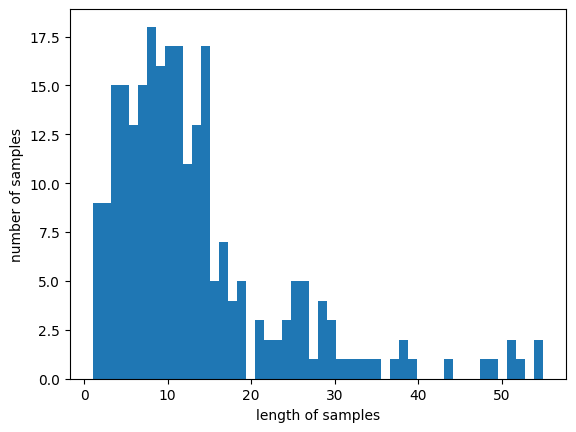

In [134]:
# 리뷰 길이 분포 확인
# map(function, iterable): Applies a given function to each item of an iterable and returns an iterator of the results
print('리뷰의 최대 길이 :', max((len(l) for l in tokenized_data)))
print('리뷰의 평균 길이 :', sum(map(len, tokenized_data)) / len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins = 50) # bins: Specifies how many intervals you want to divide your data into.
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 5. Word2Vec 훈련시키고 유사도 측정
- gensim의 word2vec을 이용하여 토큰(단어)을 의미 있는 Vector로 만듦
- wv(word2vec)의 most_similar 이용하여 유사도 측정

- CBOW, Skip-gram -> 이 두개를 통해 밀집벡터 얻을 수 있다
    - CBOW: 주변 단어를 보고 중간 단어를 예측하게 하는 것
    - Skip-gram: 한 단어를 보고 중간 단어를 예측하게 하는 것

In [144]:
# Word2Vec의 하이퍼파라미터 값은 다음과 같습니다.
# size = 워드 벡터의 특징 값. 즉, 워드 임베딩된 벡터의 차원
# window = 컨텍스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.). 데이터 적어 0으로 지정
# workers = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram

# Word2Vec 수행하게 되면 A방송사 댓글 데이터의 단어를 50차원의 밀집벡터로 변환하게 된다

# workers: Specifies how many worker threads (parallel processes) are used to train the model

from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 50, window = 5, min_count = 0, workers = 4, sg = 0)

In [146]:
model

In [148]:
# 완성된 임베딩 매트릭스의 크기 확인
# 1039개 단어를 50차원 Vector 표현

model.wv.vectors.shape

(1039, 50)

In [156]:
# 단어 개수: 1039
len(model.wv.key_to_index)

1039

In [158]:
model.wv.key_to_index

{'을': 0,
 '있다': 1,
 '좋다': 2,
 '같다': 3,
 '되다': 4,
 '우리': 5,
 '것': 6,
 '방송': 7,
 '회사': 8,
 '너무': 9,
 '보다': 10,
 '고객': 11,
 '이다': 12,
 '자다': 13,
 '되어다': 14,
 '더': 15,
 '내용': 16,
 '않다': 17,
 '적': 18,
 '에서': 19,
 '어떻다': 20,
 '없다': 21,
 '아쉽다': 22,
 '재미있다': 23,
 '수': 24,
 '기업': 25,
 '서비스': 26,
 '감사하다': 27,
 '많다': 28,
 '화이팅': 29,
 '부분': 30,
 '대한': 31,
 '프로그램': 32,
 '로': 33,
 '인': 34,
 '기대': 35,
 '업무': 36,
 '쇼핑': 37,
 '생각': 38,
 '설명': 39,
 '시간': 40,
 '앞': 41,
 '재밌다': 42,
 '화': 43,
 '요': 44,
 '에게': 45,
 '들다': 46,
 '나오다': 47,
 '짧다': 48,
 '어렵다': 49,
 '점': 50,
 '이미지': 51,
 '조금': 52,
 '새롭다': 53,
 '다음': 54,
 '가다': 55,
 '자막': 56,
 '많이': 57,
 '부족하다': 58,
 '보이다': 59,
 '이해': 60,
 '다양하다': 61,
 '고': 62,
 '직원': 63,
 '말': 64,
 '사내': 65,
 '모습': 66,
 '상품': 67,
 '인데': 68,
 '해주다': 69,
 '항상': 70,
 '으로도': 71,
 '만': 72,
 '픽': 73,
 '소개': 74,
 '모르다': 75,
 '보고': 76,
 '제': 77,
 '필요하다': 78,
 '정말': 79,
 '트렌드': 80,
 '보여주다': 81,
 '등': 82,
 '기술': 83,
 '활용': 84,
 '일': 85,
 '더욱': 86,
 '응원': 87,
 '통해': 88,
 '도움': 89,
 '개통': 90

In [162]:
# 응원 단어에 대한 Word2Vec 변환된 Vector 출력: 1개 단어를 50차원 표현

print(model.wv.get_vector('응원').shape)
model.wv.get_vector('응원')

(50,)


array([ 7.4872286e-03,  2.6143298e-03,  5.7536215e-03,  1.5866246e-02,
        1.2880995e-02,  6.2428890e-03,  1.7228292e-02, -1.3639927e-02,
        1.3916835e-02,  6.9111544e-03, -1.2417872e-02, -1.0107938e-02,
        1.3468661e-02,  1.2154038e-02, -2.1277932e-02,  2.9955714e-03,
        2.6870575e-05,  2.1426766e-03,  1.1906430e-02, -1.5509950e-02,
        1.9578593e-02, -1.8128742e-02,  1.4347110e-02,  1.8829504e-02,
       -7.3501915e-03, -1.8526400e-02,  1.1786505e-02, -1.8414449e-02,
       -1.8793903e-02, -6.2294351e-04, -1.2680339e-02,  1.7346868e-02,
        1.5501482e-02,  2.0399573e-03,  1.5006168e-02,  2.0758813e-02,
        1.1196631e-02,  9.2556281e-03,  1.0868018e-02,  1.1762902e-02,
        1.1727095e-02,  1.2515043e-02, -1.5744429e-02,  1.7884798e-02,
        1.9706674e-02,  1.8544257e-02, -1.8361542e-02, -7.6981336e-03,
        6.2050077e-04,  8.3568338e-03], dtype=float32)

In [164]:
# 노력 키워드 유사도 조회
print(model.wv.most_similar("노력"))

[('본부', 0.4776908755302429), ('일어나지', 0.4480215013027191), ('좋다', 0.36190661787986755), ('위로', 0.3484272360801697), ('천', 0.34047698974609375), ('싸우다', 0.33427873253822327), ('주제가', 0.33345985412597656), ('지나가다', 0.3307112157344818), ('능력', 0.3299713432788849), ('자주', 0.32911962270736694)]


In [166]:
# 코로나 키워드 유사도 조회
print(model.wv.most_similar("코로나"))

[('극', 0.5728501677513123), ('시도', 0.43056005239486694), ('바라다', 0.4267127811908722), ('문제', 0.4191444516181946), ('시키다', 0.3923543393611908), ('검토', 0.38317981362342834), ('함께', 0.3809696435928345), ('로만', 0.3791075050830841), ('어쩌다', 0.3757895827293396), ('합동', 0.36594462394714355)]


In [168]:
# 회사 키워드 유사도 조회
print(model.wv.most_similar("회사"))

[('아무래도', 0.45863640308380127), ('타', 0.38790959119796753), ('조금', 0.3857957422733307), ('나', 0.3811718225479126), ('하단', 0.3621708154678345), ('보다', 0.36174526810646057), ('서비스', 0.3563868999481201), ('콘셉트', 0.35310181975364685), ('성', 0.3474140167236328), ('중', 0.3471275568008423)]


### 배운 내용 정리
- 1. Word Embedding: 단어를 의미 있는 밀집 벡터로 표현하기
  2. Word Embedding 방법에는 Word2Vec, FastText 등이 있다
  3. Word2Vec도 단어를 밀집 벡터로 표현하는 방법이며
  4. Word2Vec 사용하여 단어를 밀집 벡터로 만들면, Cosine 유사도처럼 벡터 간의 유사성을 측정할 수 있어, 다른 단어와의 유사성을 측정할 수 있다

## (2) FastText
- FastText: Word Embedding 종류 중 하나로 토큰(단어)를 의미 있는 n차원 밀집 벡터 만드는 것
- Word2Vec은 단어를 쪼개질 수 없는 단위로 생각한다면
- FastText는 하나의 단어 안에도 여러 단어들이 존재하는 것으로 간주하여 subword를 고려하여 학습한다.
- 즉, 단어를 n-gram으로 나누고 나눠진 n-gram의 밀집벡터를 구하고 모두 합산해서 단어 벡터를 만든다
- 모르는 단어(Out of Vocabulary, OOV)에 대해서도 subword를 통해 유사도가 비슷한 다른 단어를 찾을 수 있다

- Word2Vec: Produces one fixed vector per word type(token)
- FastText: Gives you one fixed vector "per word", but it's built from subword (n-gram) components

### 학습 목차
A. Word2Vec
- 1. KoNLPy 설치 및 필요한 라이브러리 임포트
  2. 훈련 데이터 불러오기: A 방송사 댓글 데이터
  3. 훈련 데이터 전처리: null, 특수문자 제거 및 Okt로 토큰화
  4. OKT 이용하여 토크나이즈
  5. Word2Vec 훈련시키고 유사도 측정

B. FastText (if n: 2 ~ 5 -> 2-gram, 3-gram, 4-gram, 5-gram 모두 합산해서 하나의 Vector로 만든다)
- 1. FastText 훈련시키고 유사도 측정

### 실습으로 비교하는 Word2Vec vs FastText

### A. Word2Vec

### 1. KoNLPy 설치 및 라이브러리 임포트

In [184]:
!pip install openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec

!python3 -m pip install konlpy
from konlpy.tag import Okt

python(7279) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


python(7280) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


### 2. 훈련 데이터 불러오기: A방송사 댓글 데이터

In [187]:
# kbn_train.xlsw, kbn_test.xlsw KBN 댓글 다운로드 및 Pandas read_excel() 함수 활용하여 읽고 합치기

kbn_train = pd.read_excel('https://github.com/gzone2000/TEMP_TEST/raw/master/A_comment_train.xlsx', engine = 'openpyxl')
kbn_test = pd.read_excel('https://github.com/gzone2000/TEMP_TEST/raw/master/A_comment_test.xlsx', engine = 'openpyxl')

train_data = pd.concat([kbn_train, kbn_test])

In [189]:
train_data[:5]

,Unnamed: 0,data,label
0,0,재미는 있는데 시간이 짧은게 아쉽네요~,긍정
1,1,"OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄",부정
2,2,스토리가 너무 딱딱해서 별로였음,부정
3,3,프로그램A 화이팅하세요!!,긍정
4,4,높은 곳에 올라가는 모습이 너무 위험해 보여요.,부정


In [191]:
print(len(train_data)) # 리뷰 개수 출력

352


### 3. 훈련 데이터 전처리
- null 제거
- 불필요 특수문자, 숫자 등 제거

In [197]:
# NULL 값 존재 유무
print(train_data.isnull().sum())

Unnamed: 0    0
data          0
label         0
dtype: int64


In [200]:
# 'data' 컬럼에 대해 한글 외 문자 제거
train_data['data'] = train_data['data'].str.replace(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex = True)

In [202]:
train_data[:5]

,Unnamed: 0,data,label
0,0,재미는 있는데 시간이 짧은게 아쉽네요,긍정
1,1,관련 내용은 우리 직원과는 거리가 멀었음 특히 사내에 홍보할 내용은 아니라고 봄,부정
2,2,스토리가 너무 딱딱해서 별로였음,부정
3,3,프로그램 화이팅하세요,긍정
4,4,높은 곳에 올라가는 모습이 너무 위험해 보여요,부정


In [204]:
train_data[-5:]

,Unnamed: 0,data,label
96,96,작년에 프로그램를 재밋게 봤던 시청자로서 올해의 미니드라마도 매우 기대가 됩니다 올...,긍정
97,97,프로그램 잘 보았습니다 모든일의 바탕은 안전인것 같습니다 모두를 보호하는 최고의 기...,긍정
98,98,위험한 시설에 대한 설명도 부탁드립니다,부정
99,99,구체적으로 어떤 활동을 해왔었고 앞으로 어떤활동을 할건지 잘 설명해줬으면 좋았을 것...,부정
100,100,우리 회사가 잘되면 나라도 잘된다 회사 화이팅 나라 화이팅,긍정


### 4. OKT 이용하여 토크나이즈

In [206]:
# 불용어 정의
stopwords = ['의', '가', '이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [209]:
# 형태소 분석기 OKT를 사용한 토큰화 작업
# 352개 문장 사용하여 금방 수행함

okt = Okt()
tokenized_data = []
for sentence in train_data['data']:
    temp_X = okt.morphs(sentence, stem=True) # 형태소 분류하여 토큰화, stem=True 어간만 추출
    temp_X = [word for word in temp_X if not word in stopwords] #불용어 제거
    tokenized_data.append(temp_X)

In [211]:
print(tokenized_data[0])
print(tokenized_data[1])
print(tokenized_data[-3:])

['재미', '있다', '시간', '짧다', '아쉽다']
['관련', '내용', '우리', '직원', '과는', '거리', '멀다', '특히', '사내', '홍보', '내용', '아니다', '봄']
[['위험하다', '시설', '대한', '설명', '부탁드리다'], ['구체', '적', '어떻다', '활동', '을', '해오다', '앞', '어떤', '활동', '을', '건지다', '자다', '설명', '해주다', '좋다', '것', '같다'], ['우리', '회사', '되다', '나라', '되다', '회사', '화이팅', '나라', '화이팅']]


### 5. Word2Vec 훈련시키고 유사도 측정
- gensim의 Word2Vec을 이용하여 토큰(단어)을 의미 있는 Vector로 만듦
- wv(워드투벡터)의 most_similar 이용하여 유사도 측정

In [218]:
# size = 워드 임베딩된 벡터의 차원
# window = 컨택스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.) 데이터 적어 0으로 지정
# worker = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram


from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, vector_size = 50, window = 50, min_count = 0, workers = 4, sg = 0)

In [222]:
model.wv.vectors.shape

(1240, 50)

In [226]:
len(model.wv.key_to_index)

1240

In [228]:
model.wv.key_to_index

{'을': 0,
 '있다': 1,
 '좋다': 2,
 '같다': 3,
 '되다': 4,
 '우리': 5,
 '것': 6,
 '방송': 7,
 '회사': 8,
 '보다': 9,
 '너무': 10,
 '자다': 11,
 '이다': 12,
 '고객': 13,
 '되어다': 14,
 '더': 15,
 '내용': 16,
 '서비스': 17,
 '않다': 18,
 '로': 19,
 '적': 20,
 '프로그램': 21,
 '수': 22,
 '에서': 23,
 '없다': 24,
 '어떻다': 25,
 '감사하다': 26,
 '화이팅': 27,
 '재미있다': 28,
 '기대': 29,
 '항상': 30,
 '앞': 31,
 '부분': 32,
 '인': 33,
 '기업': 34,
 '업무': 35,
 '아쉽다': 36,
 '대한': 37,
 '화': 38,
 '생각': 39,
 '설명': 40,
 '점': 41,
 '많다': 42,
 '새롭다': 43,
 '하고': 44,
 '들다': 45,
 '모습': 46,
 '요': 47,
 '해주다': 48,
 '일': 49,
 '다음': 50,
 '정말': 51,
 '에게': 52,
 '쇼핑': 53,
 '다양하다': 54,
 '부족하다': 55,
 '시간': 56,
 '나오다': 57,
 '기술': 58,
 '많이': 59,
 '으로도': 60,
 '가다': 61,
 '재밌다': 62,
 '모르다': 63,
 '활동': 64,
 '사내': 65,
 '소개': 66,
 '보이다': 67,
 '이미지': 68,
 '더욱': 69,
 '정보': 70,
 '짧다': 71,
 '보고': 72,
 '직원': 73,
 '응원': 74,
 '조금': 75,
 '분': 76,
 '말': 77,
 '자막': 78,
 '어렵다': 79,
 '구성': 80,
 '유익하다': 81,
 '등': 82,
 '지점': 83,
 '활용': 84,
 '만': 85,
 '발전': 86,
 '이해': 87,
 '싶다': 88,
 '인데': 89,
 '다': 90,


In [230]:
print(model.wv.get_vector('우리').shape)
print(model.wv.get_vector('우리'))

(50,)
[ 0.01338262 -0.0020234  -0.00030202 -0.00504923 -0.05961359 -0.06264377
  0.04981148  0.08890024 -0.11745052 -0.04404685  0.01965791 -0.07654399
  0.04139161  0.01255119 -0.07258711  0.02211571  0.07934754  0.02890834
 -0.09772889 -0.02541128  0.0150612   0.0528612   0.08101416 -0.02478107
  0.03633468  0.04360081 -0.01447952 -0.01093593 -0.07437438  0.04732362
  0.01200753 -0.01122215 -0.02666172 -0.01511144 -0.06661499  0.05068859
  0.01688502  0.00297857  0.04838132 -0.07771023  0.05894678 -0.01738761
  0.00829257  0.00639978  0.12129708  0.0206754   0.00244234 -0.05623551
  0.0401266   0.01066603]


In [232]:
# 우리나라 키워드 유사도 조회: 단어 집합(Vocabulary)에 존재하지 않는 단어 입력으로 OOV 에러 발생
print(model.wv.most_similar("우리나라"))

KeyError: "Key '우리나라' not present in vocabulary"

### B. FastText

#### FastText 훈련시키고 유사도 측정
- gensim의 FastText을 이용하여 토큰(단어)을 의미 있는 Vector로 만듦
- FastText wv(Word2vec)의 most_similar 이용하여 유사도 측정

In [237]:
# FastText 이용하여 토큰(단어)를 의미 있는 Vector 만들기

# size = 워드 임베딩된 벡터의 차원
# window = 컨택스트 윈도우 크기
# min_count = 단어 최소 빈도 수 제한(빈도가 적은 단어들은 학습하지 않는다.) 데이터 적어 0으로 지정
# worker = 학습을 위한 프로세스 수
# sg = 0은 CBOW, 1은 Skip-gram

from gensim.models import FastText
FT_model = FastText(sentences = tokenized_data, vector_size = 50, window = 5, min_count = 0, workers = 4, sg = 0)

In [239]:
FT_model.wv.vectors.shape

(1240, 50)

In [243]:
FT_model.wv.key_to_index

{'을': 0,
 '있다': 1,
 '좋다': 2,
 '같다': 3,
 '되다': 4,
 '우리': 5,
 '것': 6,
 '방송': 7,
 '회사': 8,
 '보다': 9,
 '너무': 10,
 '자다': 11,
 '이다': 12,
 '고객': 13,
 '되어다': 14,
 '더': 15,
 '내용': 16,
 '서비스': 17,
 '않다': 18,
 '로': 19,
 '적': 20,
 '프로그램': 21,
 '수': 22,
 '에서': 23,
 '없다': 24,
 '어떻다': 25,
 '감사하다': 26,
 '화이팅': 27,
 '재미있다': 28,
 '기대': 29,
 '항상': 30,
 '앞': 31,
 '부분': 32,
 '인': 33,
 '기업': 34,
 '업무': 35,
 '아쉽다': 36,
 '대한': 37,
 '화': 38,
 '생각': 39,
 '설명': 40,
 '점': 41,
 '많다': 42,
 '새롭다': 43,
 '하고': 44,
 '들다': 45,
 '모습': 46,
 '요': 47,
 '해주다': 48,
 '일': 49,
 '다음': 50,
 '정말': 51,
 '에게': 52,
 '쇼핑': 53,
 '다양하다': 54,
 '부족하다': 55,
 '시간': 56,
 '나오다': 57,
 '기술': 58,
 '많이': 59,
 '으로도': 60,
 '가다': 61,
 '재밌다': 62,
 '모르다': 63,
 '활동': 64,
 '사내': 65,
 '소개': 66,
 '보이다': 67,
 '이미지': 68,
 '더욱': 69,
 '정보': 70,
 '짧다': 71,
 '보고': 72,
 '직원': 73,
 '응원': 74,
 '조금': 75,
 '분': 76,
 '말': 77,
 '자막': 78,
 '어렵다': 79,
 '구성': 80,
 '유익하다': 81,
 '등': 82,
 '지점': 83,
 '활용': 84,
 '만': 85,
 '발전': 86,
 '이해': 87,
 '싶다': 88,
 '인데': 89,
 '다': 90,


In [245]:
# vocab에 없는 단어도 유사도 측정 가능, OOV에러 발생 안함
# FastText에서 '우리나라' 단어가 존재하지 않지만 다른 단어 '우리'와 '나라'라는 내부 단어가 있었다면
# FastText는 '우리나라' 단어 처리 가능

print(FT_model.wv.most_similar("우리나라"))

[('화략', 0.4181791841983795), ('짜증나다', 0.4136500060558319), ('싶다', 0.3911409378051758), ('한편', 0.37974488735198975), ('대', 0.36641815304756165), ('화가', 0.3548526167869568), ('우리', 0.33895260095596313), ('와의', 0.33858904242515564), ('고증', 0.3368239104747772), ('움직이다', 0.3366609215736389)]


In [249]:
print(FT_model.wv.get_vector("우리"))
print(FT_model.wv.get_vector("나라"))
print(FT_model.wv.get_vector("우리나라"))

[-0.0036074  -0.00191003 -0.00246432  0.00195471  0.00063266  0.00695891
  0.0006627   0.01411322 -0.00173318 -0.01075992  0.01312685 -0.00810981
  0.00788887  0.01133492 -0.00123143  0.01474619 -0.00181972  0.00894544
 -0.01590903  0.00419086  0.00170656  0.01146377  0.00092112  0.00083378
 -0.001662    0.00542236  0.00565767 -0.00225916  0.00023023  0.00439124
 -0.00723911 -0.01320247 -0.00656167  0.00048769 -0.0008562   0.01424387
 -0.00490174  0.00227658  0.00089839 -0.00538479  0.0042242   0.00862837
  0.00847607 -0.00658822  0.01995017  0.00521275 -0.0044144  -0.00881412
  0.00506745 -0.0087281 ]
[ 5.2157752e-03 -7.3137507e-04 -3.3079006e-03 -4.7933953e-03
 -2.7157739e-03  7.9197073e-03  2.4900339e-03  9.6534910e-03
  6.4341668e-03  4.8257327e-03 -1.1767671e-03 -4.9175140e-03
  3.7878305e-03  3.8098209e-03  1.7929473e-04  2.5449554e-04
  6.5741460e-03 -2.0796212e-03 -6.0465606e-03  9.9572595e-03
  5.0964030e-03  5.9988075e-03 -6.0127527e-03  1.9387609e-03
 -2.8611906e-03 -5.17661

# 5.  자연어 처리 (5) 언어 모델(LSTM, BERT)
- 언어 모델
    - 이전 단어들로 그 다음에 등장할 단어의 확률을 예측하는 방식으로 학습(이전 state로 미래 state를 예측)
    - 다음의 등장할 단어를 잘 예측하는 모델은 그 언어의 특성이 잘 반영된 모델이자, 문맥을 잘 계산하는 좋은 언어 모델

RNN 언어 모델을 이용한 Application
- 마지막 출력은 앞선 단어들의 '문맥'을 고려해서 만들어진 최종 출력 벡터: Context 벡터
- 출력된 context 벡터 값에 대해 classification layer를 붙이면 문장 분류 모델

LSTM: Cell state 이용하여 불필요한 기억을 지우고, 기억해야 할 것들을 기억하도록 함

Seq2Seq: 인코더 + 디코더 구성
- Encoder layer: RNN 구조를 통해 Context Vector를 획득
- Decoder layer: 획득된 Context Vector를 입력으로 받아 다음 출력 예측
- 문제점
    - 입력 Sequenced의 길이가 매우 긴 경우, 처음에 나온 token에 대한 정보가 희석
    - 고정된 context vector 사이즈로 인해 긴 sequence에 대한 정보를 함축하기 어려움

[자연어 처리 모델링 Flow]
1. 전처리: 중복, Null, 한글 이외 숫자, 특수문자 제거 여부
2. 한글 KoNLPy의 Mecab, Okt 통한 형태소 분석 및 불용어 처리
3. Tokenizer: 단어를 숫자 변경(단어 사전 만들기)
4. Vocab 크기 결정(vocab_size): 전체 단어 중 빈도수 2 이하인 단어 제거 결정
5. 한 문장의 최대 길이 결정(max_len)
6. 패딩(Padding)
7. Embedding Output 크기 결정(output_dim)
8. RNN, LSTM, GRU 모델 설계 + DNN

#### A 방송사 댓글 감성 분류
- A 방송사 댓글 데이터를 전처리하고, keras 토크나이저를 활용하여 토큰화하고 일정 크기의 문장으로 맞추기 위해 패딩한다.
- Embedding layer를 이용해서 단어를 n차원 밀집벡터를 만들고 train 시에 학습되도록 한다
- LSTM 언어 모델과 DNN 합쳐서 감성 분류를 수행한다.

[자연어 처리 순서]
토크나이저(단어를 숫자 매핑, 단어 사전 만들기) -> 문장을 숫자 나열(texts_to_sequences) -> 문장 길이 맞게 Padding
-> Embedding(단어를 의미 있는 밀집 Vector 표현) -> 모델링

[실습 처리 순서]
1. 라이브러리 임포트
2. 파일 읽어오기
3. 특수 문자 제거: 한글, 특수문자 제거
4. 전처리: Null, 중복 제거
5. Label(정답) 분포 확인
6. Label 숫자로 인코딩
7. X, Y 분리
8. train_set와 test_set 분리
9. 전체 문장에 대해 Tokenizing
10. texts_to_sequences: 문장을 숫자로 나열
11. padding sequence
12. Modeling: Embedding, LSTM

### 1. 라이브러리 import

In [1]:
!pip install openpyxl

import numpy as np
import pandas as pd

### 2. 파일 읽어오기

In [4]:
final_data = pd.read_excel("https://github.com/gzone2000/TEMP_TEST/raw/master/A_comment_train.xlsx", engine = 'openpyxl' )

In [5]:
final_data.head()

,Unnamed: 0,data,label
0,0,재미는 있는데 시간이 짧은게 아쉽네요~,긍정
1,1,"OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄",부정
2,2,스토리가 너무 딱딱해서 별로였음,부정
3,3,프로그램A 화이팅하세요!!,긍정
4,4,높은 곳에 올라가는 모습이 너무 위험해 보여요.,부정


In [6]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  251 non-null    int64 
 1   data        251 non-null    object
 2   label       251 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.0+ KB


### 3. 특수문자 제거

In [8]:
# data 컬럼의 내용 중에 영문, 특수문자 있는지 확인: 영문과 특수문자 존재 확인
# .values: Convert the pandas DataFrame into a 2D Numpy array, dropping its index and columns labels
final_data[final_data['data'].str.contains('[^가-힣 ]')].values[:10]

array([[0, '재미는 있는데 시간이 짧은게 아쉽네요~', '긍정'],
       [1, 'OO 관련 내용은 우리 직원과는 거리가 멀었음, 특히, 사내에 홍보할 내용은 아니라고 봄', '부정'],
       [3, '프로그램A 화이팅하세요!!', '긍정'],
       [4, '높은 곳에 올라가는 모습이 너무 위험해 보여요.', '부정'],
       [5,
        '너무 재밌게 잘봤습니다~! ㅋㅋ\n송OO씨가 출근하자마자 안마의자 앉아서 쉬는게 부럽기도(?) 했네요\n쇼호스트분들의 진행솜씨또한 감탄하고 갑니다. 다음은 어디 외부 탐방 예정인가요?!',
        '긍정'],
       [6, '비유가 너무 찰떡이에요! ', '긍정'],
       [7, '광고가 섭외된 모델이랑 너무 찰떡이네요. 목소리가 너무 잘 어울려요. ', '긍정'],
       [8,
        '이달의 픽은 재미 싹쓰리입니다. 요즘 온라인에 재밌는 영상과 사진이 너무 많아서 읽다보면 시간 가는 줄 모릅니다.',
        '긍정'],
       [11, '내용이 와닿지 않아요. 좀 더 실제와 같았으면 하네요..', '부정'],
       [12, '미숙한 진행으로 전체적으로 지루함을 느꼈어요.', '부정']], dtype=object)

In [13]:
# data 컬럼의 내용에서 숫자, 영문자, 공백 등의 글자는 삭제 처리
final_data['data'] = final_data['data'].str.replace(r'[^가-힣 ]', '', regex = True)

In [15]:
final_data['data'][final_data['data'].str.contains('[^가-힣 ]')].sum()

0

### 4. 전처리

In [18]:
final_data.tail()

,Unnamed: 0,data,label
246,246,영상서비스로 간편하게 설치좋아요우리 회사화이팅,긍정
247,247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다 화이팅 입니다,긍정
248,248,사내방송 특성상 최근 이슈화 되거나 언급이 자주되는 키워드를 중심으로 뉴스를 구성하...,부정
249,249,방송 시간이 너무 길어요,부정
250,250,처음 들어보는 말들이 많은데 설명이 없어서 힘드네요,부정


In [20]:
# data 컬럼의 내용을 양끝의 빈공간 삭제
final_data['data'] = final_data['data'].str.strip()

In [22]:
final_data.tail()

,Unnamed: 0,data,label
246,246,영상서비스로 간편하게 설치좋아요우리 회사화이팅,긍정
247,247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다 화이팅 입니다,긍정
248,248,사내방송 특성상 최근 이슈화 되거나 언급이 자주되는 키워드를 중심으로 뉴스를 구성하...,부정
249,249,방송 시간이 너무 길어요,부정
250,250,처음 들어보는 말들이 많은데 설명이 없어서 힘드네요,부정


In [24]:
# 필요없는 'Unnamed: 0' 컬럼 삭제
final_data = final_data.drop(['Unnamed: 0'], axis = 1)

In [26]:
final_data.tail()

,data,label
246,영상서비스로 간편하게 설치좋아요우리 회사화이팅,긍정
247,모든 업무에서 맡은바 업무에 서 최선을 다하는 모습이 좋습니다 화이팅 입니다,긍정
248,사내방송 특성상 최근 이슈화 되거나 언급이 자주되는 키워드를 중심으로 뉴스를 구성하...,부정
249,방송 시간이 너무 길어요,부정
250,처음 들어보는 말들이 많은데 설명이 없어서 힘드네요,부정


In [27]:
# Null 있는지 확인
final_data.isnull().sum()

data     0
label    0
dtype: int64

In [30]:
# 중복 데이터 있는지 확인: 2건 중복 존재 확인
final_data['data'].duplicated().sum()

2

In [32]:
# inplace = True parameter: Tells pandas to perform the operation directly on the existing DataFrame rather than creating and returning a modified copy
# If inplace = False: Pandas would return a new DataFrame with duplicates removed, leaving the original DataFrame unchanged
final_data.drop_duplicates(subset = ['data'], inplace = True)

In [34]:
# 기존 251 -> 이후 249: 2건 중복 삭제 확인
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 249 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    249 non-null    object
 1   label   249 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


### 5. Label 분포 확인

In [37]:
# 한글 그래프 그리기
import matplotlib.pyplot as plt

<Axes: xlabel='label'>

/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

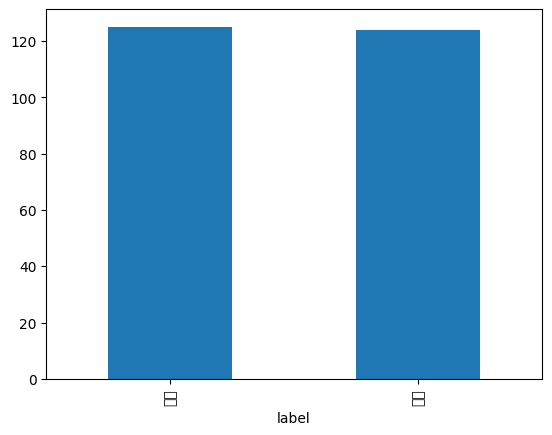

In [39]:
# plot bar 차트 그리기
final_data['label'].value_counts().plot(kind = 'bar')

### 6. label 숫자로 인코딩

In [42]:
label2class = {'긍정': 0, '부정': 1}
class2label = {0: '긍정', 1: '부정'}
final_data['label'] = final_data['label'].map(label2class)

In [44]:
final_data.head()

,data,label
0,재미는 있는데 시간이 짧은게 아쉽네요,0
1,관련 내용은 우리 직원과는 거리가 멀었음 특히 사내에 홍보할 내용은 아니라고 봄,1
2,스토리가 너무 딱딱해서 별로였음,1
3,프로그램 화이팅하세요,0
4,높은 곳에 올라가는 모습이 너무 위험해 보여요,1


In [46]:
# DataFrame 저장
# index = False: Tells pandas not to write the DataFrame's row labels (the index) into the CSV file
# By default, pandas includes the index as the first column in the output.
# Setting index = False prevents that extra column from appearing
final_data.to_csv('A_comment.csv', index = False)

### 7. X, Y 분리

In [49]:
# X, Y 분리
features = final_data['data'].values
labels = final_data['label'].values

In [51]:
features.shape, labels.shape

((249,), (249,))

In [53]:
features[:3]

array(['재미는 있는데 시간이 짧은게 아쉽네요',
       '관련 내용은 우리 직원과는 거리가 멀었음 특히 사내에 홍보할 내용은 아니라고 봄',
       '스토리가 너무 딱딱해서 별로였음'], dtype=object)

In [55]:
print('이벤트 문자열 최대 길이 : {}'.format(max(len(l) for l in features)))
print('이벤트 문자열 평균 길이 : {}'.format(sum(map(len, features))/len(features)))

이벤트 문자열 최대 길이 : 160
이벤트 문자열 평균 길이 : 43.91967871485944


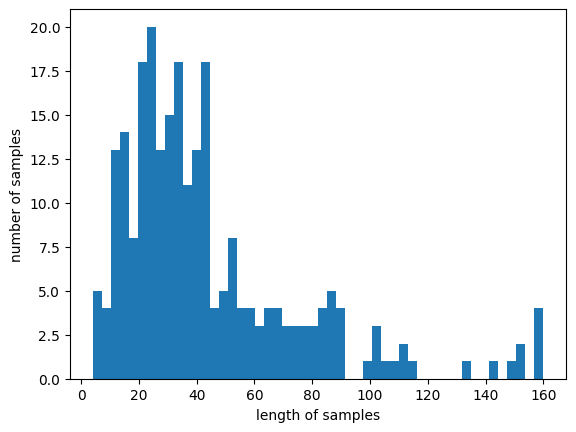

In [57]:
plt.hist([len(s) for s in features], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

### 8. train set와 test set 분리

In [60]:
from sklearn.model_selection import train_test_split

# stratify: Ensures that the proportion of each class label in the training and test sets matches the proportion in the original dataset
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, stratify = labels, random_state = 41)
x_train.shape, x_test.shape

((199,), (50,))

In [61]:
# 샘플 확인, 0: 긍정, 1: 부정
x_train[:2], y_train[:2]

(array(['저도 입사 개월 갓 지난 신입사원으로써 많이 공감되는 부분이 있고 완전 판매를 위해서 꼼꼼히 케어하여 업무처리해야겠다고 생각되었습니다 매장에서 적용할 부분들에 대해서도 도움이 되고 유쾌하게 풀어내어 이래저래 꾸준히 챙겨보고 있습니다 감사합니다',
        '매 방송마다 신선한 아이디어가 많이 도출되는 것 같아요'], dtype=object),
 array([0, 0]))

### 9. 전체 문장에 대해 Tokenizing
- 컴퓨터가 이해하기 위해 모든 단어를 숫자로 변환해야 함

In [63]:
!pip install tensorflow

In [67]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
# Tokenizer 구현: 단어 사전 만들기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

In [69]:
# 단어에 대한 숫자 매핑
print(tokenizer.word_index)

{'우리': 1, '너무': 2, '것': 3, '잘': 4, '더': 5, '같습니다': 6, '같아요': 7, '좋은': 8, '대한': 9, '수': 10, '좀': 11, '감사합니다': 12, '어떤': 13, '조금': 14, '회사의': 15, '있는': 16, '많이': 17, '회사': 18, '항상': 19, '부분이': 20, '재밌게': 21, '재미있게': 22, '방송': 23, '하는': 24, '프로그램': 25, '정말': 26, '도움이': 27, '고객의': 28, '새로운': 29, '좋겠습니다': 30, '사내': 31, '있었습니다': 32, '방송은': 33, '보고': 34, '응원합니다': 35, '통해': 36, '가장': 37, '쇼핑': 38, '앞으로도': 39, '있습니다': 40, '보는': 41, '어떻게': 42, '보았습니다': 43, '기대됩니다': 44, '차별화된': 45, '다소': 46, '금일': 47, '회사가': 48, '기업이미지': 49, '시간': 50, '아쉬웠습니다': 51, '화이팅': 52, '다양한': 53, '좋을': 54, '합니다': 55, '유익한': 56, '없는': 57, '기획': 58, '많은': 59, '한': 60, '방송이': 61, '서비스': 62, '됩니다': 63, '저도': 64, '케어하여': 65, '되고': 66, '신선한': 67, '전혀': 68, '있어': 69, '잘봤습니다': 70, '최근': 71, '계속': 72, '있었으면': 73, '이미지': 74, '기업의': 75, '참': 76, '있네요': 77, '봤습니다': 78, '아쉽습니다': 79, '있을': 80, '하고': 81, '있는지': 82, '같네요': 83, '함께': 84, '재미있고': 85, '제': 86, '픽은': 87, '마음을': 88, '서비스에': 89, '내용이': 90, '이번': 91, '입니다': 92, '업무를': 93, '모습을':

In [70]:
print(tokenizer.index_word)

{1: '우리', 2: '너무', 3: '것', 4: '잘', 5: '더', 6: '같습니다', 7: '같아요', 8: '좋은', 9: '대한', 10: '수', 11: '좀', 12: '감사합니다', 13: '어떤', 14: '조금', 15: '회사의', 16: '있는', 17: '많이', 18: '회사', 19: '항상', 20: '부분이', 21: '재밌게', 22: '재미있게', 23: '방송', 24: '하는', 25: '프로그램', 26: '정말', 27: '도움이', 28: '고객의', 29: '새로운', 30: '좋겠습니다', 31: '사내', 32: '있었습니다', 33: '방송은', 34: '보고', 35: '응원합니다', 36: '통해', 37: '가장', 38: '쇼핑', 39: '앞으로도', 40: '있습니다', 41: '보는', 42: '어떻게', 43: '보았습니다', 44: '기대됩니다', 45: '차별화된', 46: '다소', 47: '금일', 48: '회사가', 49: '기업이미지', 50: '시간', 51: '아쉬웠습니다', 52: '화이팅', 53: '다양한', 54: '좋을', 55: '합니다', 56: '유익한', 57: '없는', 58: '기획', 59: '많은', 60: '한', 61: '방송이', 62: '서비스', 63: '됩니다', 64: '저도', 65: '케어하여', 66: '되고', 67: '신선한', 68: '전혀', 69: '있어', 70: '잘봤습니다', 71: '최근', 72: '계속', 73: '있었으면', 74: '이미지', 75: '기업의', 76: '참', 77: '있네요', 78: '봤습니다', 79: '아쉽습니다', 80: '있을', 81: '하고', 82: '있는지', 83: '같네요', 84: '함께', 85: '재미있고', 86: '제', 87: '픽은', 88: '마음을', 89: '서비스에', 90: '내용이', 91: '이번', 92: '입니다', 93: '업무를', 94: '모

In [71]:
# 단어별 빈도 수 확인
print(tokenizer.word_counts)

OrderedDict({'저도': 3, '입사': 1, '개월': 1, '갓': 1, '지난': 1, '신입사원으로써': 1, '많이': 8, '공감되는': 1, '부분이': 7, '있고': 1, '완전': 1, '판매를': 1, '위해서': 1, '꼼꼼히': 2, '케어하여': 3, '업무처리해야겠다고': 2, '생각되었습니다': 2, '매장에서': 2, '적용할': 2, '부분들에': 2, '대해서도': 2, '도움이': 6, '되고': 3, '유쾌하게': 2, '풀어내어': 2, '이래저래': 2, '꾸준히': 1, '챙겨보고': 1, '있습니다': 4, '감사합니다': 10, '매': 1, '방송마다': 1, '신선한': 3, '아이디어가': 1, '도출되는': 1, '것': 33, '같아요': 14, '아직은': 1, '들이': 2, '미숙해보이네요': 1, '어색한': 1, '말이': 2, '들려요': 1, '저희': 2, '우리': 35, '회사직원분들과': 1, '호흡도': 1, '좋았고': 1, '진행이': 2, '상당히': 1, '매끄로워': 1, '보는': 4, '내내': 1, '즐거웠습니다': 1, '직원분들도': 1, '전혀': 3, '꿀리는거': 1, '없이': 1, '너무': 35, '능숙해': 1, '지셨네요': 1, '분량이': 1, '치우쳐': 1, '있어': 3, '앞부분의': 1, '내용은': 2, '기억에': 2, '잘': 28, '안남는': 1, '같습니다': 18, '고객의': 6, '입장에서': 1, '생각하면': 1, '새로운': 6, '트렌드가': 1, '보이는': 2, '재밌게': 7, '잘봤습니다': 3, '송씨가': 1, '출근하자마자': 1, '안마의자': 1, '앉아서': 1, '쉬는게': 1, '부럽기도': 1, '했네요쇼호스트분들의': 1, '진행솜씨또한': 1, '감탄하고': 1, '갑니다': 2, '다음은': 1, '어디': 1, '외부': 2, '탐방': 1, '예정인가요': 1, '우리회사와':

In [72]:
# 총 단어 개수: 1418
max_words = len(tokenizer.index_word)
print(max_words)

1418


### 10. texts_to_sequences: 문장을 숫자로 나열

In [74]:
# 문장을 숫자로 나열
x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

In [75]:
print(len(x_train_seq), len(x_test_seq))

199 50


In [76]:
print(x_train[1:3])
print(x_train_seq[1:3])

['매 방송마다 신선한 아이디어가 많이 도출되는 것 같아요' '아직은 들이 미숙해보이네요 어색한 말이 많이 들려요']
[[311, 312, 67, 313, 17, 314, 3, 7], [315, 133, 316, 317, 134, 17, 318]]


### 11. Padding Sequence

In [87]:
# 문장의 최대 길이 파악
max(len(line) for line in x_train_seq)

36

In [89]:
# 모든 문장을 최대 문장 길이 36에 맞춘다
x_train_pad = pad_sequences(x_train_seq, maxlen = 36)
x_test_pad = pad_sequences(x_test_seq, maxlen = 36)

In [91]:
x_train_pad[:1]

array([[  0,   0,   0,   0,   0,   0,  64, 299, 300, 301, 302, 303,  17,
        304,  20, 305, 306, 307, 308, 123,  65, 124, 125, 126, 127, 128,
        129,  27,  66, 130, 131, 132, 309, 310,  40,  12]], dtype=int32)

In [93]:
x_train_pad.shape, x_test_pad.shape

((199, 36), (50, 36))

### 12. 모델링

In [96]:
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool2D
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [98]:
max_words = 1418 + 1 # 총 단어 개수 + padding 0 번호
max_len = 36 # 최대 문장 길이
embedding_dim = 32

In [100]:
# 모델 선언
model = Sequential()

In [102]:
# 단어를 의미 있는 32차원으로 Vector 변경
model.add(Embedding(input_dim = max_words, output_dim = embedding_dim, input_length = max_len))

/Users/shinjoohwan/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [104]:
model.add(LSTM(16, return_sequences=True))
model.add(Flatten())
model.add(Dense(128, activation = 'swish'))
model.add(Dense(32, activation = 'swish'))
model.add(Dense(2, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [106]:
# 조기종료 콜백 함수 정의
es = EarlyStopping(monitor='val_loss', patience = 10, verbose =1)

# 체크포인트 저장
checkpoint_path = 'tmp_checkpoint.weights.h5'
cp = ModelCheckpoint(checkpoint_path, save_weights_only = True, monitor = 'val_loss',
                    verbose = 1, save_best_only = True)

In [108]:
%%time
history = model.fit(x_train_pad, y_train, epochs = 50, batch_size = 512,
                   validation_split = 0.2, verbose = 1, callbacks = [es, cp])

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 844ms/step - accuracy: 0.5723 - loss: 0.6919
Epoch 1: val_loss improved from inf to 0.69299, saving model to tmp_checkpoint.weights.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step - accuracy: 0.5723 - loss: 0.6919 - val_accuracy: 0.5250 - val_loss: 0.6930
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5849 - loss: 0.6892
Epoch 2: val_loss did not improve from 0.69299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5849 - loss: 0.6892 - val_accuracy: 0.5250 - val_loss: 0.6933
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5912 - loss: 0.6859
Epoch 3: val_loss did not improve from 0.69299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5912 - loss: 0.6859 - val_accuracy: 0.5250 - val_loss: 0.6944
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5912 - loss: 0.6815
Epoch 4: val_loss did not improve from 0.69299
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5912 - loss: 0.6815 - val_accuracy: 0.525

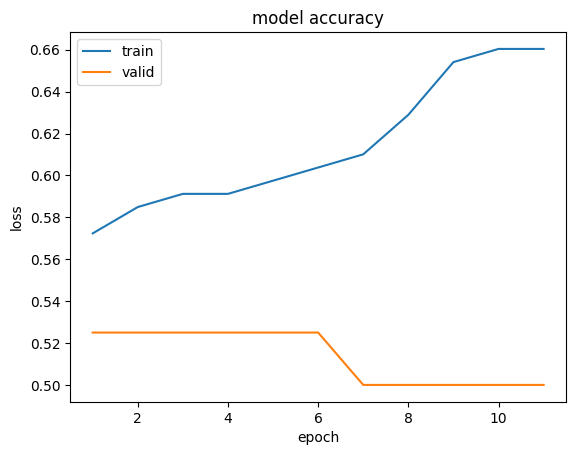

In [110]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'])
plt.show()

In [112]:
model.evaluate(x_test_pad, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5371 - loss: 0.6811 


[0.681753396987915, 0.5400000214576721]

### 예측해보기

In [115]:
print(f'문자열: {x_test[0]}')
print(f'Sequence: {x_test_pad[0]}')

문자열: 관련 내용은 우리 직원과는 거리가 멀었음 특히 사내에 홍보할 내용은 아니라고 봄
Sequence: [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 481 137   1 137]


In [119]:
predict = model.predict(x_test_pad[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


In [120]:
print(f'True: {class2label[y_test[0]]}')
print(f'Predict: {class2label[np.argmax(predict)]}')

True: 부정
Predict: 부정
